In [ ]:
Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

Artificial Intelligence (AI):

AI is the broad field focused on building systems that can mimic human intelligence and decision-making.

Example: Chatbots, recommendation systems, self-driving cars.

Machine Learning (ML):

A subset of AI where machines learn patterns from data and improve over time without being explicitly programmed.

Example: Predicting house prices using historical data.

Deep Learning (DL):

A specialized subset of ML using neural networks with multiple layers to learn complex patterns and representations.

Example: Image recognition (e.g., detecting cats vs dogs).

Data Science (DS):

A multidisciplinary field combining statistics, ML, domain knowledge, and data analysis to extract insights and knowledge from structured and unstructured data.

Example: Analyzing customer data to improve marketing campaigns.

Question 2: What are the types of machine learning? Describe each with one real-world example.

Supervised Learning

The model is trained on labeled data (input-output pairs).

Example: Spam email classification (spam vs. not spam).

Unsupervised Learning

The model finds hidden patterns or groupings in unlabeled data.

Example: Customer segmentation in marketing.

Reinforcement Learning (RL)

The model learns by interacting with the environment and receiving rewards/penalties.

Example: Training robots to walk or self-driving cars.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.

Overfitting: The model learns the training data too well (including noise), resulting in poor generalization on test data.

Underfitting: The model is too simple and fails to capture patterns in the training data.

Bias-Variance Tradeoff:

High Bias (Underfitting): Model assumptions are too strong, performance is poor.

High Variance (Overfitting): Model is too complex, captures noise.

Goal: Find a balance between bias and variance for best performance.

Question 4: What are outliers in a dataset, and list three common techniques for handling them.

Outliers: Extreme values that deviate significantly from most observations.

Techniques to handle outliers:

Z-score or IQR method: Detect and remove/transform outliers.

Capping (Winsorization): Replace extreme values with nearest acceptable value.

Transformation: Apply log/Box-Cox transformations to reduce impact.

Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.

Process:

Identify missing values.

Decide whether to remove or impute.

Apply suitable imputation technique.

Numerical Data: Use mean imputation.

Categorical Data: Use mode imputation (most frequent value).

Question 6: Write a Python program that creates a synthetic imbalanced dataset with make_classification() and prints the class distribution.

In [1]:
from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Print class distribution
print("Class distribution:", Counter(y))


Class distribution: Counter({np.int64(0): 895, np.int64(1): 105})


Question 7: Implement one-hot encoding using pandas for the list ['Red', 'Green', 'Blue', 'Green', 'Red'].

In [2]:
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])

# One-hot encoding
encoded = pd.get_dummies(df, columns=['Color'])
print(encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


Question 8: Write a Python script to generate 1000 samples, introduce 50 missing values, fill with mean, and plot histograms.

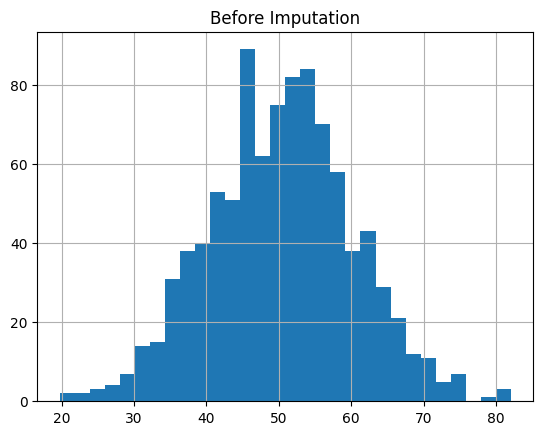

/tmp/ipython-input-398001403.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


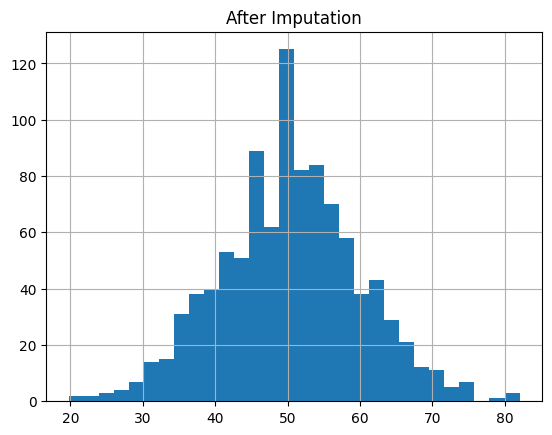

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate normal distribution
data = np.random.normal(50, 10, 1000)
df = pd.DataFrame(data, columns=['Value'])

# Introduce 50 missing values
missing_idx = np.random.choice(df.index, 50, replace=False)
df.loc[missing_idx, 'Value'] = np.nan

# Plot before imputation
df['Value'].hist(bins=30)
plt.title("Before Imputation")
plt.show()

# Fill missing with mean
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Plot after imputation
df['Value'].hist(bins=30)
plt.title("After Imputation")
plt.show()


Question 9: Implement Min-Max scaling on [2, 5, 10, 15, 20].

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print(scaled.flatten())


[0.         0.16666667 0.44444444 0.72222222 1.        ]


Question 10: You are working as a data scientist for a retail company. Data preparation plan.

Step 1: Handle Missing Data

Use mean/median imputation for missing ages.

Use mode for missing categorical values like payment method.

Step 2: Handle Outliers

Apply IQR or Z-score method to detect outliers in transaction amount.

Either cap them or log-transform.

Step 3: Handle Imbalanced Data

Use SMOTE (Synthetic Minority Oversampling Technique) or undersampling/oversampling to balance fraud vs non-fraud.

Step 4: Encode Categorical Variables

Apply one-hot encoding for categorical features (e.g., payment method).

Step 5: Scaling & Normalization

Apply Min-Max scaling or StandardScaler for continuous variables.

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Example dataset
data = pd.DataFrame({
    'Age': [25, None, 35, None, 45],
    'Transaction': [200, 5000, 300, 250, 100000],
    'Payment': ['Card', 'Cash', 'Card', 'UPI', None],
    'Fraud': [0, 0, 1, 0, 1]
})

# Handle missing values
num_imputer = SimpleImputer(strategy='mean')
data['Age'] = num_imputer.fit_transform(data[['Age']])

cat_imputer = SimpleImputer(strategy='most_frequent')
data['Payment'] = cat_imputer.fit_transform(data[['Payment']]).flatten()

# Handle outliers (example: capping transaction)
data['Transaction'] = data['Transaction'].clip(upper=data['Transaction'].quantile(0.95))

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Payment']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Payment']))
data = pd.concat([data.drop('Payment', axis=1), encoded_df], axis=1)

# Scaling
scaler = MinMaxScaler()
data[['Transaction']] = scaler.fit_transform(data[['Transaction']])

# Handle imbalance
X = data.drop('Fraud', axis=1)
y = data['Fraud']
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(X, y)

print(X_res.head())
print(y_res.value_counts())

    Age  Transaction  Payment_Card  Payment_Cash  Payment_UPI  Payment_None
0  25.0     0.000000           1.0           0.0          0.0           0.0
1  35.0     0.059406           0.0           1.0          0.0           0.0
2  35.0     0.001238           1.0           0.0          0.0           0.0
3  35.0     0.000619           0.0           0.0          1.0           0.0
4  45.0     1.000000           0.0           0.0          0.0           1.0
Fraud
0    3
1    3
Name: count, dtype: int64


/tmp/ipython-input-3134804746.py:22: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Transaction'] = data['Transaction'].clip(upper=data['Transaction'].quantile(0.95))
